# Time series basic forecasting methods

## Import libraries

In [2]:
%config Completer.use_jedi = False
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Setup

We repeat the useful function for the creation of timeseries data. See the notebook timeseries_fundamentals for more details on those functions

In [1]:
# This function will be used to plot all the time series

def plot_series(time,series,format="-",start=0,end=None,label=None):
    
    plt.plot(time[start:end],series[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    if label:
        plt.legend(fontsize=14)
    
    plt.grid(True)
    
def trend(time,slope):
    
    return time*slope

def seasonal_pattern(season_time):
    
    return np.where(season_time<0.4, np.cos(season_time*2*np.pi),1/ np.exp(3*season_time))
  
def seasonality(time,period=365, amplitude=1, phase=0):
    
    season_time = ((time+phase)%period)/period
    
    return amplitude*seasonal_pattern(season_time)

def white_noise(time, noise_level=1,seed=None):

    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level
    

Let us create the time series

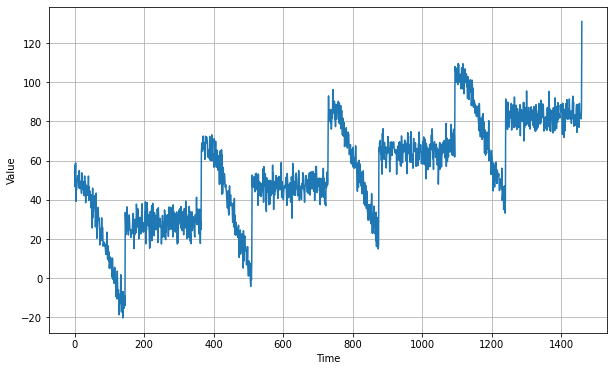

In [70]:
time = np.arange(4*365+1,dtype='float32')
baseline=10
amplitude=40
slope=0.05
noise_level=5

series = baseline+trend(time,slope)+seasonality(time,period=365,amplitude=amplitude)+white_noise(time,noise_level=noise_level,seed=94)

plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

## Split train validation data

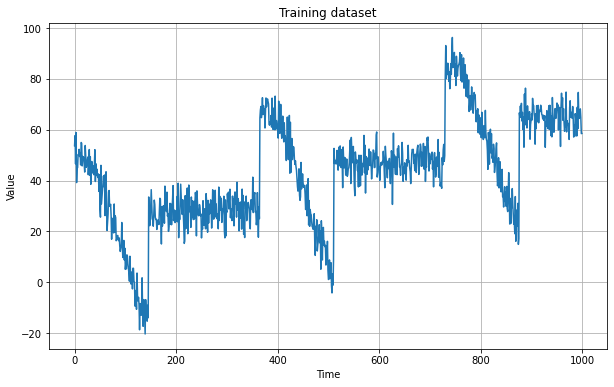

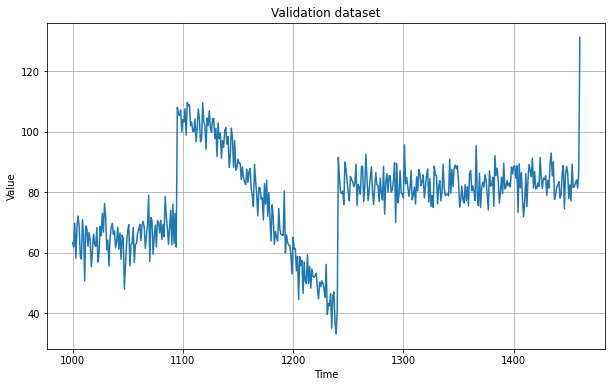

In [13]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(10,6))
plot_series(time_train,x_train)
plt.title("Training dataset")
plt.show()

plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plt.title("Validation dataset")
plt.show()


## Naive Forecast

The predicted value for the serie at time t is the value of the serie at time t-1.

So for a given serie x, the predicted value at time t is given by :

$$\hat{x}(t)=x(t-1)$$

In [7]:
naive_forecast = series[split_time-1:-1]

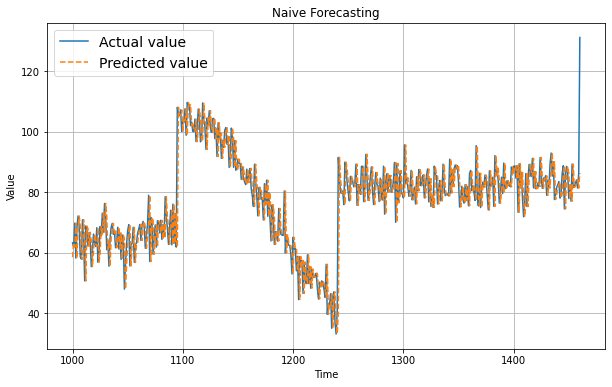

In [32]:
plt.figure(figsize=(10, 6))
plt.title("Naive Forecasting")
plot_series(time_valid, x_valid,label="Actual value")
plot_series(time_valid, naive_forecast,label="Predicted value",format='--')

Let's zoom in a little bit

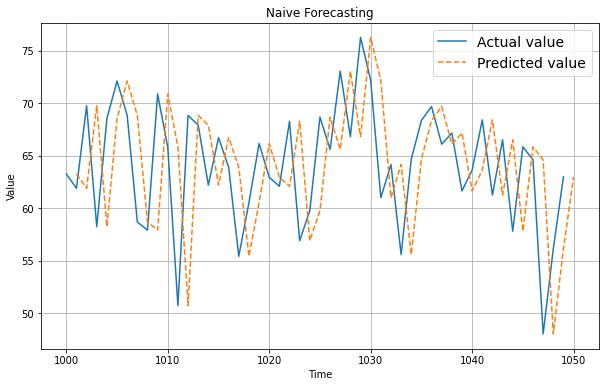

In [31]:
plt.figure(figsize=(10, 6))
plt.title("Naive Forecasting")
plot_series(time_valid, x_valid,label="Actual value",start=0,end=50)
plot_series(time_valid, naive_forecast,label="Predicted value",start=1,end=51,format='--')

### Performance - Metric calculation - MSE, MAE

#### MSE

In [28]:
keras.metrics.mean_squared_error(x_valid,naive_forecast).numpy()

63.407564427237176

MAE

In [29]:
keras.metrics.mean_absolute_error(x_valid,naive_forecast).numpy()

5.8735915109106225

## Moving Averages

For the moving average method, we consider a fixed window size k. The predicted value for the serie x at time t is given by the average of the time serie values for the last k time units.

In [30]:
def moving_average_forecast(series, windows_size):
    forecast = []
    for time in range(len(series)-windows_size):
        forecast.append(series[time:time+windows_size].mean())
    return np.array(forecast)

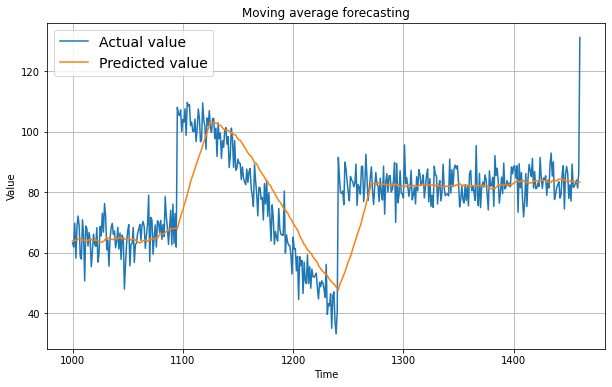

In [46]:
moving_avg = moving_average_forecast(series,30)[split_time-30:]

plt.figure(figsize=(10, 6))
plt.title("Moving average forecasting")
plot_series(time_valid, x_valid,label="Actual value",start=0)
plot_series(time_valid, moving_avg,label="Predicted value",start=0,end=None)

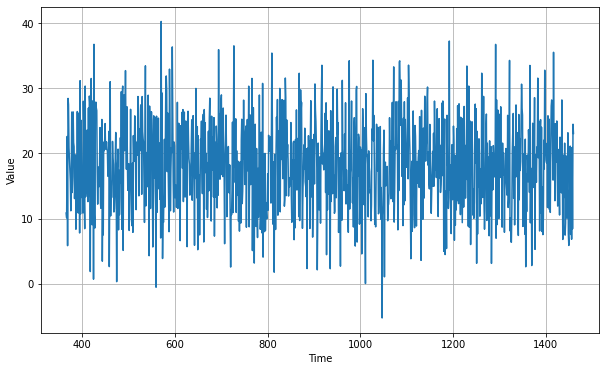

In [71]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

(1096,)